In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [3]:
pathr="C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/CLUSTER_channels/S_E12/"
fname='Allsube12.xlsx'
d=pd.read_excel(pathr+fname)
print("Total rows: {0}".format(len(d)))

Total rows: 32


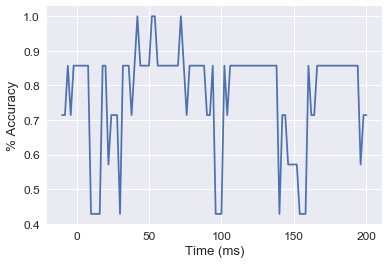

In [17]:
allacc=[];
for count in range(2,108):
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count]
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
        #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acd=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acd)
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

In [16]:
#Acd

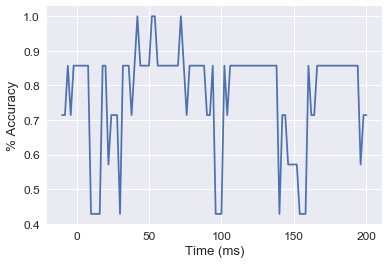

In [7]:
err=Acd.std()
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acd)
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')